In [ ]:
!pip install ultralytics


In [14]:
from ultralytics import YOLO

# Load pretrained YOLOv8 model (nano for speed)
model = YOLO("yolov8n.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [12]:
# !unzip -q /content/data.zip -d /content/
# !unzip -q /content/driver_monitoring.zip -d /content/
import yaml

with open("/content/data/data.yaml", "r") as f:
    data = yaml.safe_load(f)

class_names = data["names"]
print(class_names)


['Cigarette', 'Drinking', 'Eating', 'Phone', 'Seatbelt']


In [4]:
import os
from collections import Counter

def count_classes(label_dir):
    counter = Counter()
    for label_file in os.listdir(label_dir):
        if label_file.endswith(".txt"):
            with open(os.path.join(label_dir, label_file), "r") as f:
                for line in f:
                    cls = int(line.split()[0])
                    counter[cls] += 1
    return counter


In [6]:
train_counts = count_classes("/content/data/train/labels")
val_counts   = count_classes("/content/data/valid/labels")
test_counts  = count_classes("/content/data/test/labels")

In [7]:
def print_distribution(counts, split_name):
    print(f"\n{split_name} Distribution:")
    for cls_id, count in counts.items():
        print(f"{class_names[cls_id]}: {count}")

print_distribution(train_counts, "Train")
print_distribution(val_counts, "Validation")
print_distribution(test_counts, "Test")


Train Distribution:
Drinking: 771
Seatbelt: 429
Eating: 261
Cigarette: 365
Phone: 55

Validation Distribution:
Seatbelt: 177
Drinking: 79
Eating: 60
Cigarette: 41
Phone: 18

Test Distribution:
Seatbelt: 62
Cigarette: 43
Drinking: 105
Eating: 3
Phone: 5


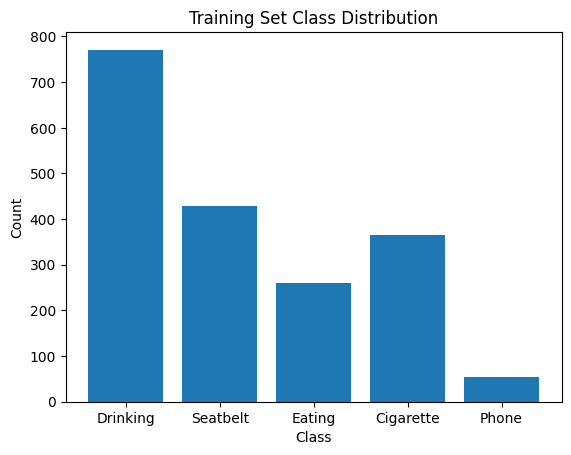

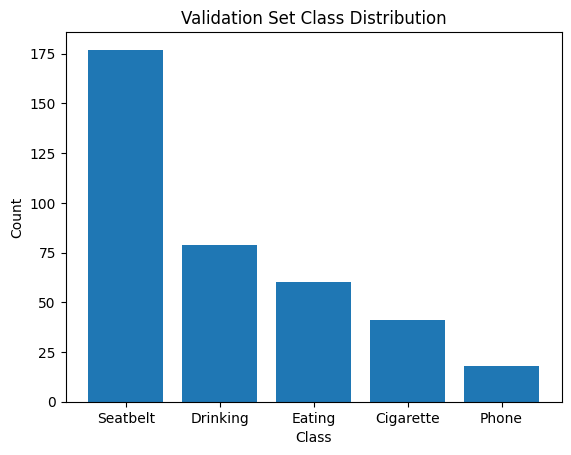

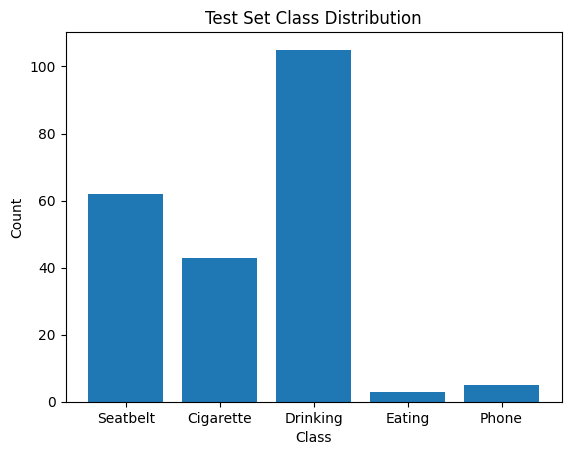

In [8]:
import matplotlib.pyplot as plt

def plot_distribution(counts, title):
    labels = [class_names[k] for k in counts.keys()]
    values = list(counts.values())

    plt.figure()
    plt.bar(labels, values)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

plot_distribution(train_counts, "Training Set Class Distribution")
plot_distribution(val_counts, "Validation Set Class Distribution")
plot_distribution(test_counts, "Test Set Class Distribution")


In [ ]:
model.train(
    data="/content/data/data.yaml",  # path to your data.yaml
    epochs=50,                 # adjust as needed
    imgsz=640,                 # image size
    batch=8,                  # batch size (adjust to GPU memory)
    project="driver_monitoring",  # folder to save results
    name="yolov8_driver",         # run name
    exist_ok=True
)


Ultralytics 8.3.250 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_driver, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78be08982750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [15]:
# Loading the Trained Model
model = YOLO("driver_monitoring/yolov8_driver/weights/best.pt")


image 1/1 /content/images.jpg: 448x640 2 Seatbelts, 44.5ms
Speed: 3.0ms preprocess, 44.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


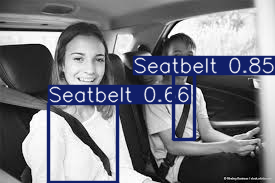

In [ ]:
results = model("/content/images.jpg")  # path to test image
results[0].show()  # display annotated image


image 1/1 /content/download.jpg: 448x640 1 Seatbelt, 14.6ms
Speed: 3.2ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


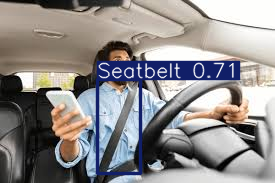

In [ ]:
results = model("/content/download.jpg")  # path to test image
results[0].show()  # display annotated image


image 1/1 /content/data/test/images/img_18754_jpg.rf.6358b31880fcc9dc4db5d90e314bf609.jpg: 480x640 1 Drinking, 15.8ms
Speed: 3.2ms preprocess, 15.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


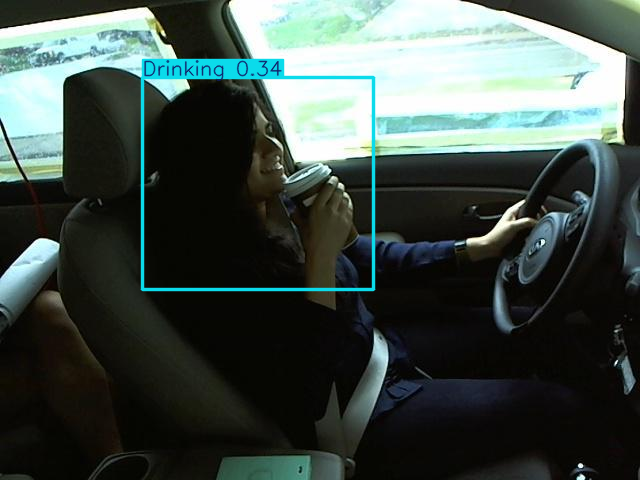

In [ ]:
results = model("/content/data/test/images/img_18754_jpg.rf.6358b31880fcc9dc4db5d90e314bf609.jpg")  # path to test image
results[0].show()


image 1/1 /content/data/train/images/Screen-Shot-2024-01-29-at-1-36-56-AM_png.rf.8074cc09eb906c40512ea35a3231df0b.jpg: 384x640 1 Phone, 12.8ms
Speed: 4.0ms preprocess, 12.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


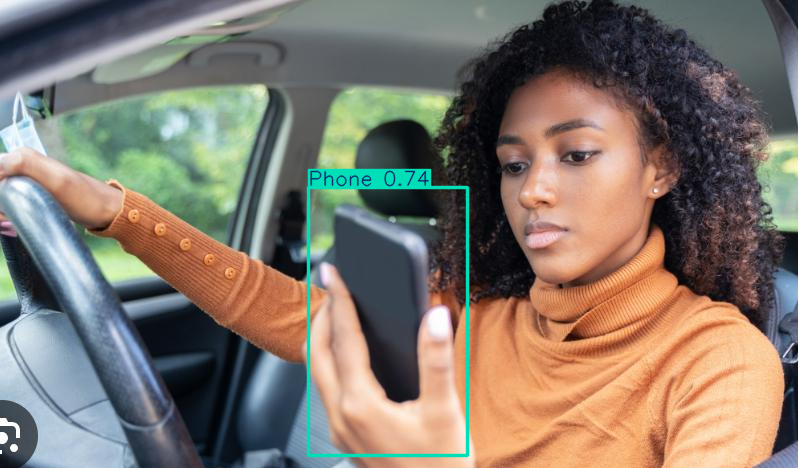

In [ ]:
results = model("/content/data/train/images/Screen-Shot-2024-01-29-at-1-36-56-AM_png.rf.8074cc09eb906c40512ea35a3231df0b.jpg")  # path to test image
results[0].show()


image 1/1 /content/data/train/images/Video2_191_jpg.rf.6a28a2a0af462863bc6fa1e545e3fe96.jpg: 384x640 1 Eating, 1 Seatbelt, 7.8ms
Speed: 2.4ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


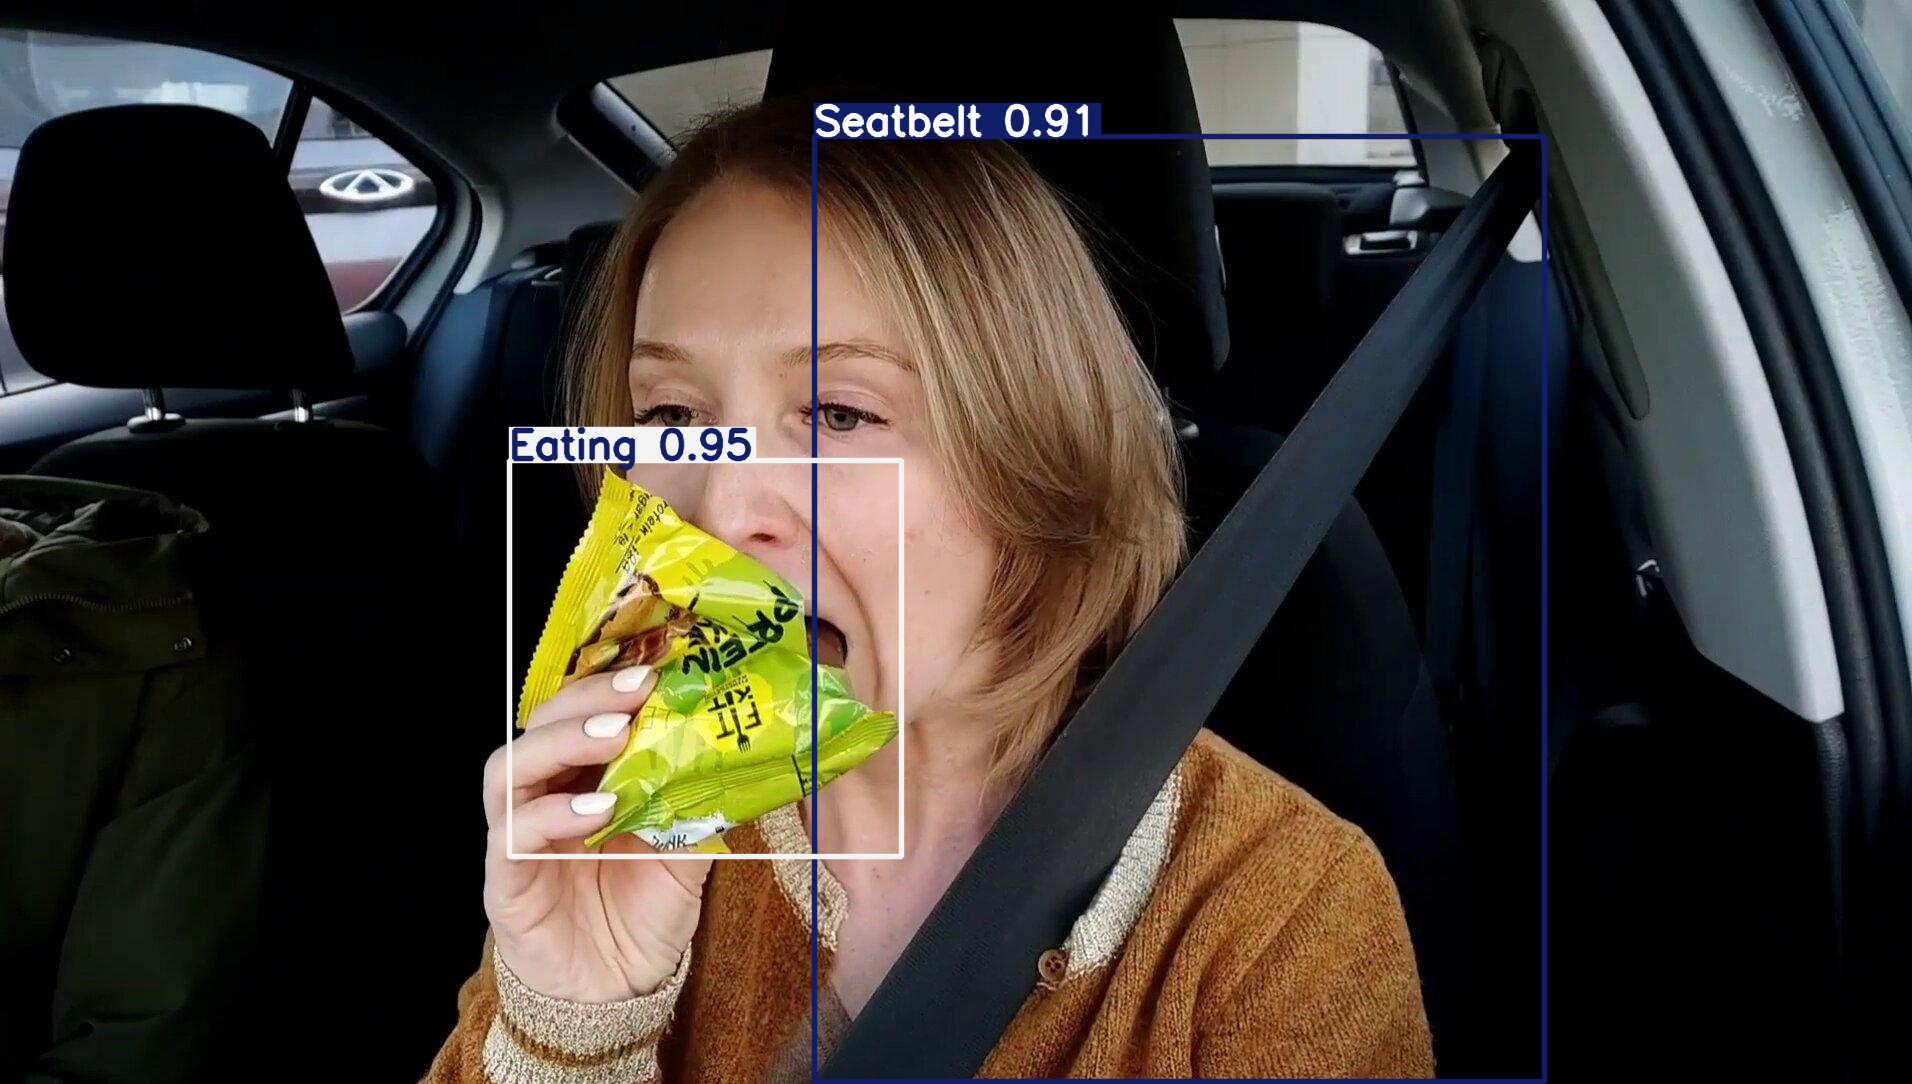

In [ ]:
results = model("/content/data/train/images/Video2_191_jpg.rf.6a28a2a0af462863bc6fa1e545e3fe96.jpg")  # path to test image
results[0].show()

In [49]:
from google.colab import files
import os

# Name of the final zip
final_zip = "DMS_project.zip"

# Make sure you are in the directory containing all your folders
# This will zip everything in the current directory
print("Zipping entire Colab session...")
os.system(f"zip -r {final_zip} .")  # '.' means current directory

# Download the zip
print("Downloading full project zip...")
files.download(final_zip)


Zipping entire Colab session...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
metrics_val = model.val(data="/content/data/data.yaml", split="val")  # or just val folder
print("Validation Metrics:")
print(metrics_val)

Ultralytics 8.3.250 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1295.4±593.3 MB/s, size: 84.0 KB)
val: Scanning /content/data/valid/labels.cache... 261 images, 14 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 261/261 505.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 17/17 3.2it/s 5.3s
                   all        261        375      0.849      0.769      0.819      0.551
             Cigarette         41         41      0.601      0.683      0.621      0.328
              Drinking         79         79      0.971      0.849      0.921      0.725
                Eating         60         60      0.882       0.95      0.942      0.523
                 Phone         18         18      0.922      0.556      0.727      0.517
              Seatbelt        173        177       0.87      0.808      0.882      0.661
Speed: 3.4ms preprocess, 8.8ms inference,

In [ ]:
metrics_test = model.val(data="/content/data/data.yaml", split="test")
print("Test Metrics:")
print(metrics_test)

Ultralytics 8.3.250 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 807.6±114.2 MB/s, size: 32.3 KB)
val: Scanning /content/data/test/labels... 211 images, 4 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 211/211 2.4Kit/s 0.1s
val: New cache created: /content/data/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 4.5it/s 3.1s
                   all        211        218      0.829      0.851      0.886      0.565
             Cigarette         43         43      0.728      0.884      0.854      0.463
              Drinking        105        105      0.912      0.794      0.856      0.536
                Eating          3          3      0.775          1      0.995      0.633
                 Phone          5          5      0.894          1      0.995      0.776
              Seatbelt         61         62      0.837      0.579      0.729      0.


image 1/1 /content/Phone.jpg: 448x640 (no detections), 28.6ms
Speed: 3.5ms preprocess, 28.6ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


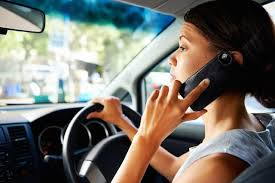

In [25]:
results = model("/content/Phone.jpg",conf = 0.20)  # path to test image
results[0].show()